# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

The purpose of this project is to determine which factors influence the price of a vehicle.

The project is going to confirm the following hypotheses:

- Is age has impact on the price of a vehicle?

- Is mileage has influence on the price of a vehicle?

- Is condition of the vehicle has impact on the price of a vehicle?

- Is Advertisment has influence in the price of a vehicle?

- Is color of the vehicle has influence?


## Initialization

In [1372]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load data

In [1373]:
# Load the data file into a DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [1374]:
# to find number of columns and rows in the DataFrame that means to see the data dimensions
print(df.shape)

(51525, 13)


In [1375]:
# To print the columns in the DataFrame using columns function
print(df.columns)

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')


In [1376]:
# print the general/summary information about the DataFrame
# To output general information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


From the general or summary information. There are int64, float64 and object types

In [1377]:
# print a sample of data

df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [1378]:
df.describe

<bound method NDFrame.describe of        price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       N

Based on the general information as well as from DataFrame describe. It is confirmed that there are 13 columns and 51,524 rows. But, there are some columns like model_year, cylinders, odometer, paint_color and is_4wd have missing values. In the is_4wd there are more than half of the values are missing. Definitly, it needs further investigation and it may need some changes which is going to be decided later in the process. Besides, odometer and paint_color columns have missing values of 15.32% and 17.99% respectively. An other observed from the data sample 'type' column has some upper case to be fixed.

There are some columns with inappropriate data types. For example model_year, is_4wd and date_posted columns need to be changed to the right data type. The model_year column should be int64 as years of model supposed to be whole numbers. When data was explored in the above the is_4wd column is boolean and it should be boolean but in the general information it is considered as float64. Last but not least, the date_posted should be changed its data type from float to date type.    

In [1379]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [1380]:
# Another way of getting missing values of the DataFrame
missing_values = df.isna().sum().to_frame()
missing_values

,0
price,0
model_year,3619
model,0
condition,0
cylinders,5260
fuel,0
odometer,7892
transmission,0
type,0
paint_color,9267


In [1381]:
# Missing values having a missing value column
missing_values = df.rename(columns = {0: 'missing_values'})
missing_values

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [1382]:
round((df.isnull().sum()*100)/len(df),2)

price            0.00
model_year       7.02
model            0.00
condition        0.00
cylinders       10.21
fuel             0.00
odometer        15.32
transmission     0.00
type             0.00
paint_color     17.99
is_4wd          50.37
date_posted      0.00
days_listed      0.00
dtype: float64

In [1383]:
df.isnull().sum()*100/len(df)

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [1384]:
df. duplicated().sum() 

0

It is confirmed there are no duplicated values in the DataFrame.

The number of rows in each column is supposed to be 51,525. But, the following columns have missed values; namely, model_year (3619 which is more than 7%), cylinder (5260 which is 10.21%), odometer (7892 which is 15.325), paint_color (9267 which is almost 18%) and is_4wd (25,953 which is 50.37%). There are three columns who have issing values more tha 15%. The is_4wd column needs further investigation.   

In [1385]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Conclusions and further steps
The methods used above confirmed that there are 13 columns and 51,525 rows. There are missing values but there are no any duplicated values. There are int64, float64 and object types. Some of the data types need to be changed because they don't look normal. 

There are missing values. The missing values of 'model_year', 'cylinders', 'odometer', 'paint_color' and 'is_4wd' columns will be studies using methods before any decision taken. The data types will be chamged into the right one. Histgrams, plot charts and correlation amont the variables will be done to determine which factors affect the price of vehicles.



## Treat missing values (if any)


The missing values of 'model_year', 'cylinders', 'odometer', 'paint_color' and 'is_4wd' columns will be studies using methods before any decision taken.

### model_car

In [1386]:
df['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [1387]:
df['model_year'].value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1955.0       1
Name: model_year, Length: 68, dtype: int64

In [1388]:
# to have a look in the filtered table at the the first column with missing data

df[df['model_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


### cylinders

In [1389]:
df['cylinders'].unique() # to check for if there are unappropriate data

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [1390]:
df['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [1391]:
# to have a look in the filtered table at the the first column with missing data
df[df['cylinders'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


In [1392]:
df['odometer'].unique() # to check for if there are unapproprate data

array([145000.,  88705., 110000., ..., 121778., 181500., 139573.])

In [1393]:
# to have a look in the filtered table at the the first column with missing data
df[df['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


### paint_color

In [1394]:
# Look for unique values using the unique() method
df['paint_color'].unique() # to check for if there are unapproprate data

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [1395]:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [1396]:
# to have a look in the filtered table at the the first column with missing data
df[df['paint_color'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


### is_4wd

In [1397]:
# Look for unique values using the unique() method
df['is_4wd'].unique()

array([ 1., nan])

In [1398]:
df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

### type 

In [1399]:
# In the 'type' column some upper case name of a car was observed
df['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [1400]:
# Apply a method to change all car names in the 'type' column into lower case
df['type'] = df['type'].str.lower()

In [1401]:
# To confirm if all upper case in 'type' column are changed to lower case
df['type'].unique()

array(['suv', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

It is confirmed all car names in 'type' coliumn are in lower case

## Fix data types

There are some columns in this DataFrame needs to change their data type. These are 'model_year', 'is_4wd' and 'date_posted' columns

### model_year

In [1402]:
# Changing the data type of 'model_year' column from float64 into int64
df['model_year'] = df['model_year'].astype('Int64')

In [1403]:
df.dtypes

price             int64
model_year        Int64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

### is_4wd

In [1404]:
df['is_4wd'] = df['is_4wd'].where(df['is_4wd'] == 1, 0)

In [1405]:
# Changing the data type of 'is_4wd' column from float64 into bool
df['is_4wd'] = df['is_4wd'].astype('bool')

In [1406]:
df['is_4wd'].unique()

array([ True, False])

In [1407]:
df.dtypes

price             int64
model_year        Int64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd             bool
date_posted      object
days_listed       int64
dtype: object

### date_posted

In [1408]:
# Changing the data type of 'date_posted' column from float64 into datetime type
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [1409]:
df.dtypes

price                    int64
model_year               Int64
model                   object
condition               object
cylinders              float64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [1410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  Int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 4.8+ MB


Using info() and dtype() methods, it is confirmed 'model_year', 'is_4wd' and 'date_posted' columns are changed to the right data type.

In [1411]:
# To handle the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  Int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 4.8+ MB


Still there are missing values in the DataFrame in the following columns 'model_year', 'cylinders', 'odometer', and 'paint_color'. The missing values can be dropped but we can lose potentially important insights. It is good to see quantitative and categorial variables separately.

In [1412]:
# To decide how to fill the missing values of 'model_year' check descriptive character of the variable
df['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

There is no much difference between the mean and median values of the variable 'model_year' either can be used



In [1413]:
model_year_mean = df['model_year'].mean()
model_year_mean

2009.75046966977

In [1414]:
model_year_mean = int(model_year_mean) 
model_year_mean

2009

In [1415]:
df['model_year'] = df['model_year'].fillna(model_year_mean)

In [1416]:
df['model_year'].head()

0    2011
1    2009
2    2013
3    2003
4    2017
Name: model_year, dtype: Int64

In [1417]:
df['model_year'].describe()

count    51525.000000
mean      2009.697758
std          6.060460
min       1908.000000
25%       2007.000000
50%       2010.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [1418]:
df['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [1419]:
# Filling the missing values of the 'cylinders' column with median
cylinders_median = df['cylinders'].median()
cylinders_median

6.0

In [1420]:
df['cylinders'] = df['cylinders'].fillna(cylinders_median)

In [1421]:
df['cylinders'].head(10)


0    6.0
1    6.0
2    4.0
3    8.0
4    4.0
5    6.0
6    4.0
7    6.0
8    4.0
9    6.0
Name: cylinders, dtype: float64

In [1422]:
df['cylinders'].describe()

count    51525.000000
mean         6.112450
std          1.573784
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [1423]:
# The following code also help to fill missing data with grouped data for 'cylinders' variable
df['cylinders'] = df['cylinders'].fillna(df.groupby('model')['cylinders'].transform('median'))

In [1424]:
df['cylinders'].head(10)

0    6.0
1    6.0
2    4.0
3    8.0
4    4.0
5    6.0
6    4.0
7    6.0
8    4.0
9    6.0
Name: cylinders, dtype: float64

In [1425]:
# Checking the mean and median values of 'odometer variable
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [1426]:
# It is decided to use median to fill the missing values of 'odometer' variable
odometer_median = df['odometer'].median()
odometer_median

113000.0

In [1427]:
df['odometer'] = df['odometer'].fillna(odometer_median)
df['odometer']

0        145000.0
1         88705.0
2        110000.0
3        113000.0
4         80903.0
           ...   
51520     88136.0
51521    181500.0
51522    128000.0
51523    139573.0
51524    113000.0
Name: odometer, Length: 51525, dtype: float64

In [1428]:
df['odometer'].describe()

count     51525.000000
mean     115162.352179
std       59909.264385
min           0.000000
25%       79181.000000
50%      113000.000000
75%      146541.000000
max      990000.000000
Name: odometer, dtype: float64

In [1429]:
# Filling missing values of 'paint_color' column
df['paint_color'].describe()

count     42258
unique       12
top       white
freq      10029
Name: paint_color, dtype: object

Since 'paint_color' variable is categorical variable the missing values will be filled by 'others'

In [1430]:
# Filling the 'paint_color' with others
df['paint_color'] = df['paint_color'].fillna(value = 'others')
df['paint_color']

0        others
1         white
2           red
3        others
4         black
          ...  
51520     black
51521     white
51522      blue
51523     black
51524    others
Name: paint_color, Length: 51525, dtype: object

In [1431]:
df['paint_color'].describe()

count     51525
unique       13
top       white
freq      10029
Name: paint_color, dtype: object

In [1432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  Int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 4.8+ MB


All the missing values are filled with the appropriate values. Now the DataFrame is ready for analysis

## Enrich data

In [1433]:
# Add datetime values for when the ad was placed
# To take out the day posted from the 'date_posted' column
df['day_posted'] = df['date_posted'].dt.day_name()
df['day_posted']

0         Saturday
1           Friday
2         Thursday
3           Friday
4          Tuesday
           ...    
51520    Wednesday
51521    Wednesday
51522     Thursday
51523       Monday
51524      Tuesday
Name: day_posted, Length: 51525, dtype: object

In [1434]:
# To take out the month posted from the 'date_posted' column
df['month_posted'] = df['date_posted'].dt.month_name()
df['month_posted']

0            June
1         October
2        February
3           March
4           April
           ...   
51520     October
51521    November
51522    November
51523        July
51524        June
Name: month_posted, Length: 51525, dtype: object

In [1435]:
# To take out the year posted from the 'date_posted' column
df['year_posted'] = pd.DatetimeIndex(df['date_posted']).year
df['year_posted']

0        2018
1        2018
2        2019
3        2019
4        2019
         ... 
51520    2018
51521    2018
51522    2018
51523    2018
51524    2018
Name: year_posted, Length: 51525, dtype: int64

In [1436]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,suv,others,True,2018-06-23,19,Saturday,June,2018
1,25500,2009,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019
3,1500,2003,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,others,False,2019-03-22,9,Friday,March,2019
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018
7,15990,2013,honda pilot,excellent,6.0,gas,109473.0,automatic,suv,black,True,2019-01-07,68,Monday,January,2019
8,11500,2012,kia sorento,excellent,4.0,gas,104174.0,automatic,suv,others,True,2018-07-16,19,Monday,July,2018
9,9200,2008,honda pilot,excellent,6.0,gas,147191.0,automatic,suv,blue,True,2019-02-15,17,Friday,February,2019


In [1437]:
df['model_year'].unique()

<IntegerArray>
[2011, 2009, 2013, 2003, 2017, 2014, 2015, 2012, 2008, 2018, 2010, 2007, 2004,
 2005, 2001, 2006, 1966, 1994, 2019, 2000, 2016, 1993, 1999, 1997, 2002, 1981,
 1995, 1996, 1975, 1998, 1985, 1977, 1987, 1974, 1990, 1992, 1991, 1972, 1967,
 1988, 1969, 1989, 1978, 1965, 1979, 1968, 1986, 1980, 1964, 1963, 1984, 1982,
 1973, 1970, 1955, 1971, 1976, 1983, 1954, 1962, 1948, 1960, 1908, 1961, 1936,
 1949, 1958, 1929]
Length: 68, dtype: Int64

In [1438]:
# Add the vehicle's age when the ad was placed

# To find vehicle's age of the current year plus 1 is done

df['vehicle_age'] =  df['year_posted'] + 1 - df['model_year'] 
df['vehicle_age']

0         8
1        10
2         7
3        17
4         3
         ..
51520     6
51521    17
51522    10
51523     6
51524     5
Name: vehicle_age, Length: 51525, dtype: Int64

In [1439]:
# Add the vehicle's average mileage per year
# Vehicle's average mileage can be calculated as follows and the current year took into account
df['average_mileage'] = df['odometer']/df['vehicle_age']

df['average_mileage']

0             18125.0
1              8870.5
2        15714.285714
3         6647.058824
4        26967.666667
             ...     
51520    14689.333333
51521    10676.470588
51522         12800.0
51523    23262.166667
51524         22600.0
Name: average_mileage, Length: 51525, dtype: Float64

In [1440]:
df['average_mileage'] = df['average_mileage'].astype(float).round(2)

In [1441]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,average_mileage
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,suv,others,True,2018-06-23,19,Saturday,June,2018,8,18125.00
1,25500,2009,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10,8870.50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,7,15714.29
3,1500,2003,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,others,False,2019-03-22,9,Friday,March,2019,17,6647.06
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,3,26967.67


In [1442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  Int64         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  object        
 4   cylinders        51525 non-null  float64       
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  float64       
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  day_posted       51525 non-null  object        
 14  month_posted     51525 non-null  objec

In [1443]:
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,average_mileage
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,suv,others,True,2018-06-23,19,Saturday,June,2018,8,18125.00
1,25500,2009,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10,8870.50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,7,15714.29
3,1500,2003,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,others,False,2019-03-22,9,Friday,March,2019,17,6647.06
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,3,26967.67
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,5,11590.80
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018,4,19803.00
7,15990,2013,honda pilot,excellent,6.0,gas,109473.0,automatic,suv,black,True,2019-01-07,68,Monday,January,2019,7,15639.00
8,11500,2012,kia sorento,excellent,4.0,gas,104174.0,automatic,suv,others,True,2018-07-16,19,Monday,July,2018,7,14882.00
9,9200,2008,honda pilot,excellent,6.0,gas,147191.0,automatic,suv,blue,True,2019-02-15,17,Friday,February,2019,12,12265.92


In [1444]:
# Have a look on the unique values of 'condition' column in order to change the data type
df['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

##### key for condition of vehicles

It will; be very helpful for analysis if the 'condition' column changed from data type object to int. The object is correleted with integer numbers as follows
- excellent = 1 
- new = 2
- like new = 3 
- good = 4 
- fair = 5 and 
- salvage = 6


In [1445]:
# It might help to replace the condition values with something that can be manipulated more easily

df.loc[df['condition'] == 'excellent', 'condition'] = 1
df.loc[df['condition'] == 'new', 'condition'] = 2
df.loc[df['condition'] == 'like new', 'condition'] = 3
df.loc[df['condition'] == 'good', 'condition'] = 4
df.loc[df['condition'] == 'fair', 'condition'] = 5
df.loc[df['condition'] == 'salvage', 'condition'] = 6


In [1446]:
# To change the data type of 'condition' column from object to int64
df['condition'] = df['condition'].astype(str).astype(int)

In [1447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  Int64         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  int64         
 4   cylinders        51525 non-null  float64       
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  float64       
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  day_posted       51525 non-null  object        
 14  month_posted     51525 non-null  objec

In [1448]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,average_mileage
0,9400,2011,bmw x5,4,6.0,gas,145000.0,automatic,suv,others,True,2018-06-23,19,Saturday,June,2018,8,18125.00
1,25500,2009,ford f-150,4,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10,8870.50
2,5500,2013,hyundai sonata,3,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,7,15714.29
3,1500,2003,ford f-150,5,8.0,gas,113000.0,automatic,pickup,others,False,2019-03-22,9,Friday,March,2019,17,6647.06
4,14900,2017,chrysler 200,1,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,3,26967.67


## Check clean data

To know exactly what was going so far it is very important to check the general or summary information and sample of the DataFrame

In [1449]:
# print the general/summary information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  Int64         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  int64         
 4   cylinders        51525 non-null  float64       
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  float64       
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  day_posted       51525 non-null  object        
 14  month_posted     51525 non-null  objec

There are no more missing values remained in the DataFrame and the data is ready for analysis

So far the number of columns and rows in the DataFrame are 18 and 51,525 respectively and all the data types look good.

In [1450]:
# print a sample of data

df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,average_mileage
0,9400,2011,bmw x5,4,6.0,gas,145000.0,automatic,suv,others,True,2018-06-23,19,Saturday,June,2018,8,18125.00
1,25500,2009,ford f-150,4,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10,8870.50
2,5500,2013,hyundai sonata,3,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,7,15714.29
3,1500,2003,ford f-150,5,8.0,gas,113000.0,automatic,pickup,others,False,2019-03-22,9,Friday,March,2019,17,6647.06
4,14900,2017,chrysler 200,1,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,3,26967.67
5,14990,2014,chrysler 300,1,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,5,11590.80
6,12990,2015,toyota camry,1,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018,4,19803.00
7,15990,2013,honda pilot,1,6.0,gas,109473.0,automatic,suv,black,True,2019-01-07,68,Monday,January,2019,7,15639.00
8,11500,2012,kia sorento,1,4.0,gas,104174.0,automatic,suv,others,True,2018-07-16,19,Monday,July,2018,7,14882.00
9,9200,2008,honda pilot,1,6.0,gas,147191.0,automatic,suv,blue,True,2019-02-15,17,Friday,February,2019,12,12265.92


## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

The above parameters will be studied attentively in order to understand how the outliers affect the form ans the readability of the histographs

In [1451]:
df.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year_posted,vehicle_age,average_mileage
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.697758,2.495682,6.112450,115162.352179,39.55476,2018.307462,9.609704,15345.035306
std,10040.803015,6.060460,1.485760,1.573784,59909.264385,28.20427,0.461447,6.074418,12333.612009
min,1.000000,1908.000000,1.000000,3.000000,0.000000,0.00000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,1.000000,4.000000,79181.000000,19.00000,2018.000000,5.000000,9302.440000
50%,9000.000000,2010.000000,3.000000,6.000000,113000.000000,33.00000,2018.000000,9.000000,12913.000000
75%,16839.000000,2014.000000,4.000000,8.000000,146541.000000,53.00000,2019.000000,13.000000,18092.330000
max,375000.000000,2019.000000,6.000000,12.000000,990000.000000,271.00000,2019.000000,111.000000,373200.000000


#### price

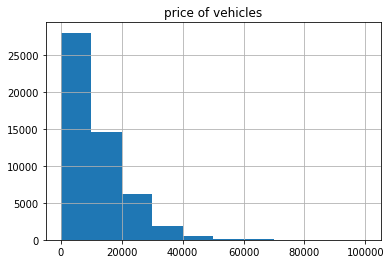

In [1452]:
# To plot the 'price' column
df['price'].hist(bins=10, range=(0, 100000))
plt.title('price of vehicles')
plt.show()



The result shows most of the vehicles are bought by a price less than 20,000. Many may seem either they are not interested or can't manage to buy expensive vehicles.

#### The vehicle's age when the ad was placed

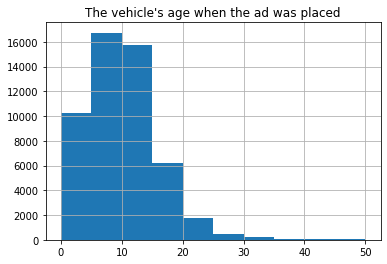

In [1453]:
# To plot the 'vehicle_age' column
df['vehicle_age'].hist(bins= 10, range=(0, 50))
plt.title("The vehicle's age when the ad was placed")
plt.show()


The result shows people bought vehicles that has served less years. People are not interested for aged vehicles. 

#### mileage

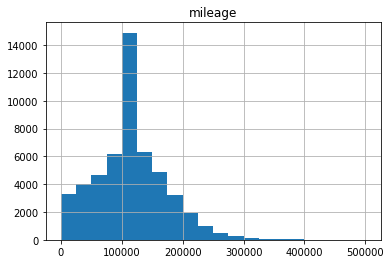

In [1454]:
# To plot the 'mileage' column
df['odometer'].hist(bins=20, range=(0, 500000))
plt.title('mileage')
plt.show()



Most people drove cars with a mileage of 100,000.

#### Number of cylinders

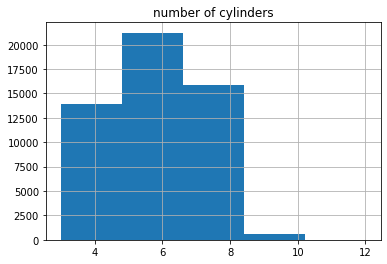

In [1455]:
# To plot the 'cylinders' column
df['cylinders'].hist(bins=5)
plt.title('number of cylinders')
plt.show()



Car owners are interested vehicles with 4 cylinders.

#### Condition

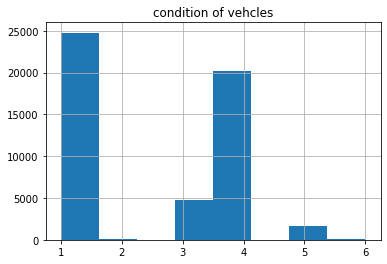

In [1456]:
# To plot the 'cylinders' column
df['condition'].hist(bins=8)
plt.title('condition of vehcles')
plt.show()


The result shows most of the vehicles are new and in good condition. 

## Study and treat outliers


Based on the above results columns with outliers will be identified as well as the lower and upper limits for normal range values will be determined.

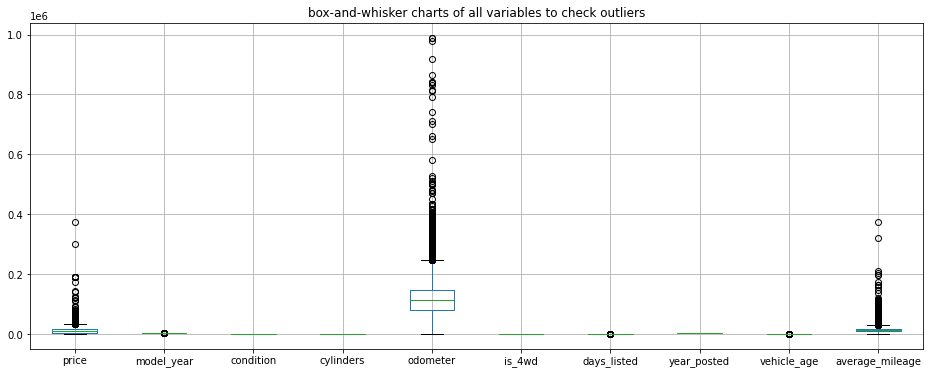

In [1457]:
# To have a look on the outliers
df.boxplot(figsize =(16, 6))
plt.title('box-and-whisker charts of all variables to check outliers')
plt.show()

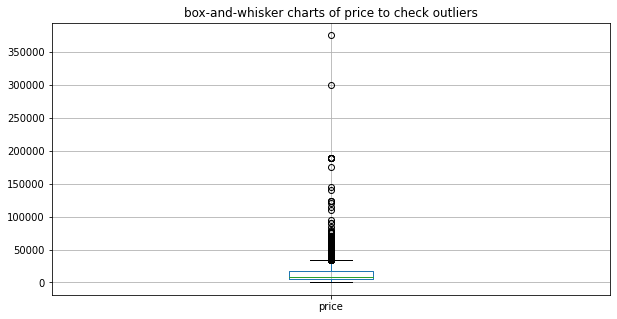

In [1458]:
# To have a look on the 'price' column outliers independentlt
df.boxplot('price', figsize =(10, 5))
plt.title('box-and-whisker charts of price to check outliers')
plt.show()

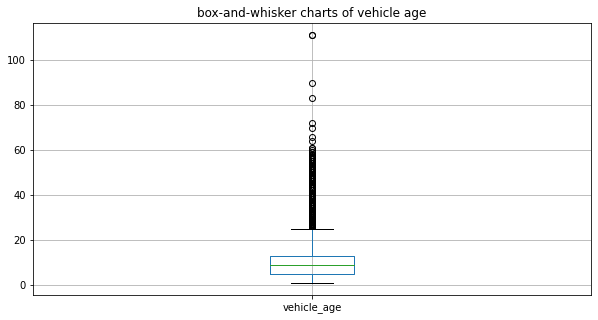

In [1459]:
# To have a look on the 'vehicle_age' column outliers independentlt
df.boxplot('vehicle_age', figsize =(10, 5))
plt.title('box-and-whisker charts of vehicle age')
plt.show()

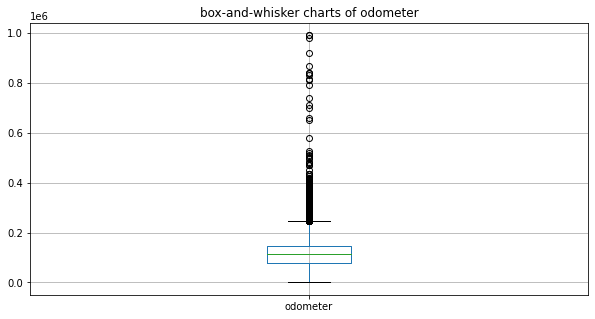

In [1460]:
# To have a look on the 'odometer' column outliers independentlt
df.boxplot('odometer', figsize =(10, 5))
plt.title('box-and-whisker charts of odometer')
plt.show()

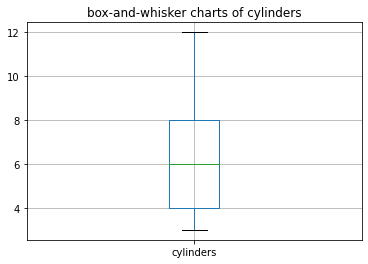

In [1461]:
# To have a look on the 'cylinders' column outliers independentlt
df.boxplot('cylinders')
plt.title('box-and-whisker charts of cylinders')
plt.show()

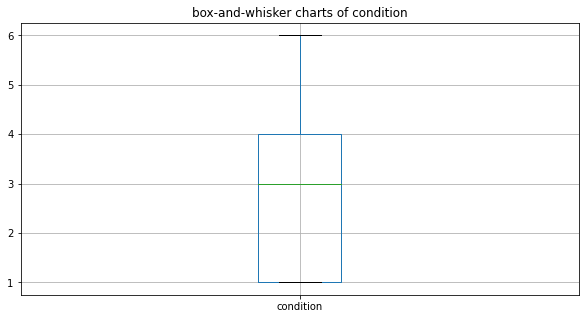

In [1462]:
# To have a look on the 'condition' column outliers independentlt
df.boxplot('condition', figsize =(10, 5))
plt.title('box-and-whisker charts of condition')
plt.show()

From the above five columns, namely, 'price', 'vehicle_age', 'odometer', 'cylinders', and 'condition' that expected to affect the data but only the 'price', 'vehicle_age', and 'odometer' have impact on the data and have extreme outliers. In the 'price' column greater than 25,000, 'vehicle_age' greater than 25 years and in the 'odometer' columngreater than 230,000 are considered as outliers based on the above results.

The lower limits of the following columns
- 'price'column is 0
- 'vehicle_age' column is 0
- 'odometer' column is 0

The upper limits of the following columns

- 'price'column is 30,000 
- 'vehicle_age' column is 25
- 'odometer' column is 0 240,000

In [1463]:
# Store data without outliers in a separate DataFrame

filtered_df = df.query('price < 30000 & vehicle_age < 25 & odometer < 240000')


In [1464]:
filtered_df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,average_mileage
0,9400,2011,bmw x5,4,6.0,gas,145000.0,automatic,suv,others,True,2018-06-23,19,Saturday,June,2018,8,18125.00
1,25500,2009,ford f-150,4,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,October,2018,10,8870.50
2,5500,2013,hyundai sonata,3,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,February,2019,7,15714.29
3,1500,2003,ford f-150,5,8.0,gas,113000.0,automatic,pickup,others,False,2019-03-22,9,Friday,March,2019,17,6647.06
4,14900,2017,chrysler 200,1,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,April,2019,3,26967.67
5,14990,2014,chrysler 300,1,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,June,2018,5,11590.80
6,12990,2015,toyota camry,1,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,Thursday,December,2018,4,19803.00
7,15990,2013,honda pilot,1,6.0,gas,109473.0,automatic,suv,black,True,2019-01-07,68,Monday,January,2019,7,15639.00
8,11500,2012,kia sorento,1,4.0,gas,104174.0,automatic,suv,others,True,2018-07-16,19,Monday,July,2018,7,14882.00
9,9200,2008,honda pilot,1,6.0,gas,147191.0,automatic,suv,blue,True,2019-02-15,17,Friday,February,2019,12,12265.92


In [1465]:
filtered_df.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year_posted,vehicle_age,average_mileage
count,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000
mean,10867.512955,2009.974477,2.473426,6.018531,113189.235651,39.509716,2018.306044,9.331567,14975.877569
std,7289.098657,4.875266,1.482592,1.572859,50433.543504,28.168279,0.460853,4.889551,10974.260567
min,1.000000,1995.000000,1.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,0.000000
25%,4999.000000,2007.000000,1.000000,4.000000,83000.000000,19.000000,2018.000000,6.000000,9392.387500
50%,8995.000000,2010.000000,3.000000,6.000000,113000.000000,33.000000,2018.000000,9.000000,12750.000000
75%,15500.000000,2014.000000,4.000000,8.000000,144231.000000,53.000000,2019.000000,12.000000,17666.670000
max,29999.000000,2019.000000,6.000000,12.000000,239950.000000,271.000000,2019.000000,24.000000,195700.000000


In [1466]:
filtered_df.isnull().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
day_posted         0
month_posted       0
year_posted        0
vehicle_age        0
average_mileage    0
dtype: int64

## Study core parameters without outliers


In this section the histograms and plots of the filterd DataFrame will be drawn in order to help to compare with the original DataFrame(df).

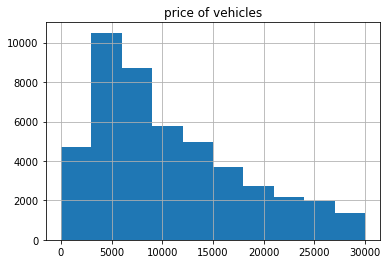

In [1467]:
# To plot the 'price' column
filtered_df['price'].hist(bins=10, range=(0, 30000))
plt.title('price of vehicles')
plt.show()

The price of the vehicles decrease with respect of age of the vehicles.

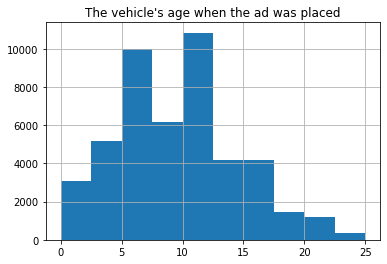

In [1468]:
# To plot the 'vehicle_age' column
filtered_df['vehicle_age'].hist(bins= 10, range=(0, 25))
plt.title("The vehicle's age when the ad was placed")
plt.show()


Almost all of the vehicles have age less than 15 years but most of the vehicles are in the age range of 5 to 15 years.

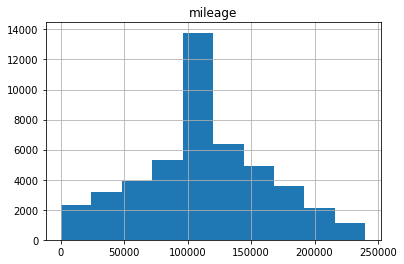

In [1469]:
# To plot the 'mileage' column
filtered_df['odometer'].hist(bins=10, range=(0, 240000))
plt.title('mileage')
plt.show()


Most of the cars have mileage around 100,000.

In [1470]:
df.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year_posted,vehicle_age,average_mileage
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.697758,2.495682,6.112450,115162.352179,39.55476,2018.307462,9.609704,15345.035306
std,10040.803015,6.060460,1.485760,1.573784,59909.264385,28.20427,0.461447,6.074418,12333.612009
min,1.000000,1908.000000,1.000000,3.000000,0.000000,0.00000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,1.000000,4.000000,79181.000000,19.00000,2018.000000,5.000000,9302.440000
50%,9000.000000,2010.000000,3.000000,6.000000,113000.000000,33.00000,2018.000000,9.000000,12913.000000
75%,16839.000000,2014.000000,4.000000,8.000000,146541.000000,53.00000,2019.000000,13.000000,18092.330000
max,375000.000000,2019.000000,6.000000,12.000000,990000.000000,271.00000,2019.000000,111.000000,373200.000000


In [1471]:
filtered_df.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year_posted,vehicle_age,average_mileage
count,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000,46624.000000
mean,10867.512955,2009.974477,2.473426,6.018531,113189.235651,39.509716,2018.306044,9.331567,14975.877569
std,7289.098657,4.875266,1.482592,1.572859,50433.543504,28.168279,0.460853,4.889551,10974.260567
min,1.000000,1995.000000,1.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,0.000000
25%,4999.000000,2007.000000,1.000000,4.000000,83000.000000,19.000000,2018.000000,6.000000,9392.387500
50%,8995.000000,2010.000000,3.000000,6.000000,113000.000000,33.000000,2018.000000,9.000000,12750.000000
75%,15500.000000,2014.000000,4.000000,8.000000,144231.000000,53.000000,2019.000000,12.000000,17666.670000
max,29999.000000,2019.000000,6.000000,12.000000,239950.000000,271.000000,2019.000000,24.000000,195700.000000


In [1472]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46624 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            46624 non-null  int64         
 1   model_year       46624 non-null  Int64         
 2   model            46624 non-null  object        
 3   condition        46624 non-null  int64         
 4   cylinders        46624 non-null  float64       
 5   fuel             46624 non-null  object        
 6   odometer         46624 non-null  float64       
 7   transmission     46624 non-null  object        
 8   type             46624 non-null  object        
 9   paint_color      46624 non-null  object        
 10  is_4wd           46624 non-null  bool          
 11  date_posted      46624 non-null  datetime64[ns]
 12  days_listed      46624 non-null  int64         
 13  day_posted       46624 non-null  object        
 14  month_posted     46624 non-null  objec

##### conclusion

- number of rows decreases from 51,525 to 46,624 which means by 9.5%
- the mean decreases from 12,132.46 to 10,867.51
- max decreases from 375,000 to 29,999
- no more missing values in the data.

## Ads lifetime

To mean, median and describe methods will be used to find the mean, median, minimum and maximum values. The mini and max values help to find range of the 'days_listed' column in order to get the typical lifetime of ad through plots.

In [1473]:
filtered_df['days_listed'].mean()

39.50971602608099

In [1474]:
filtered_df['days_listed'].median()

33.0

In [1475]:
filtered_df['days_listed'].describe()

count    46624.000000
mean        39.509716
std         28.168279
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

The median and mean values of the 'days_listed' column are 33 and 39.61 respectively.

Based on the describe(), the range of the 'days_listed' column will be between 0 and 300.

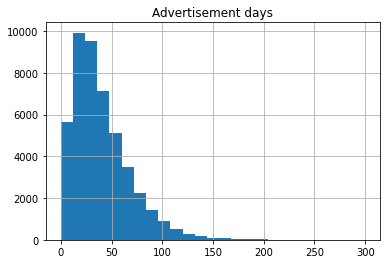

In [1476]:
# To plot the 'days_listed' column
filtered_df['days_listed'].hist(bins=25, range=(0, 300))
plt.title('Advertisement days')
plt.show()


Even though there was advertisment for almost 300 days but mostly was less than 50 days.

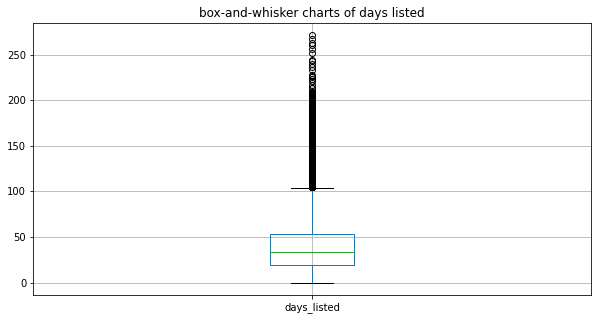

In [1477]:
df.boxplot('days_listed', figsize =(10, 5))
plt.title('box-and-whisker charts of days listed')
plt.show()

Based on the plot information, 271 days advertisements were displayed but more than 100 days should be considered as outliers. The typical lifetime of an ad is between 15 and 53 days. The ads were removed quickly below 15 days and the ads days_listed becomes abnormally longtime is after 100 days. The mean and median of the days_listed are 39.61 and 33 days respectively.

In order to remove the outliers of the 'days_listed' column and to store the DataFrame with out outliers the following is done.

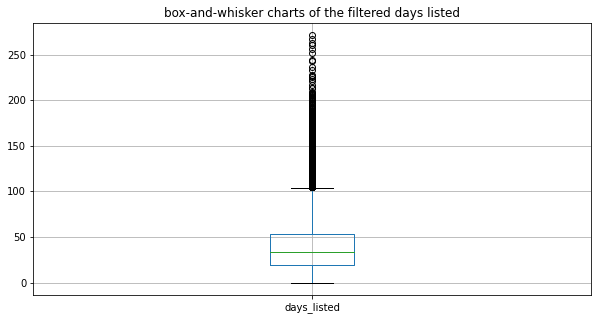

In [1478]:
filtered_df.boxplot('days_listed', figsize =(10, 5))
plt.title('box-and-whisker charts of the filtered days listed')
plt.show()

It is checked the outliers are removed

## Average price per each type of vehicle

In order to get the average or mean price of the vehicles, we should use the 'price' and 'type' columns grouped using pivot_table. The index will be 'type' in order to group them and the value will be 'price' column. The mean will be calculated using aggfunc()method. Checking the describe() character of the 'price' column helps to decide whether to use mean or median method.

In [1479]:
filtered_df['price'].describe()

count    46624.000000
mean     10867.512955
std       7289.098657
min          1.000000
25%       4999.000000
50%       8995.000000
75%      15500.000000
max      29999.000000
Name: price, dtype: float64

In [1480]:
average_price_filtered = filtered_df.pivot_table(index = 'type', values = 'price', aggfunc = 'mean')
average_price_filtered

,price
type,
bus,19959.166667
convertible,12591.261261
coupe,13432.217588
hatchback,6865.583166
mini-van,8083.147163
offroad,13974.843023
other,10025.964602
pickup,14330.769125
sedan,7000.194263


In [1481]:
# To get a table that has a columns of 'type' and 'count'
type_filtered = filtered_df['type'].value_counts()
type_filtered

sedan          11922
suv            11569
truck          10405
pickup          5830
coupe           1990
wagon           1465
mini-van        1128
hatchback        998
van              568
convertible      333
other            226
offroad          172
bus               18
Name: type, dtype: int64

In [1482]:
average_price_ads = filtered_df.pivot_table(index='type', values='price', aggfunc= ['mean', 'count'])

average_price_ads.columns = ['average_price', 'ads'] 
average_price_ads

,average_price,ads
type,,
bus,19959.166667,18
convertible,12591.261261,333
coupe,13432.217588,1990
hatchback,6865.583166,998
mini-van,8083.147163,1128
offroad,13974.843023,172
other,10025.964602,226
pickup,14330.769125,5830
sedan,7000.194263,11922


In [1483]:
average_price_ads.sort_values(by = 'ads', ascending = False)

,average_price,ads
type,,
sedan,7000.194263,11922
suv,10202.960498,11569
truck,14572.813840,10405
pickup,14330.769125,5830
coupe,13432.217588,1990
wagon,9020.450512,1465
mini-van,8083.147163,1128
hatchback,6865.583166,998
van,8587.385563,568


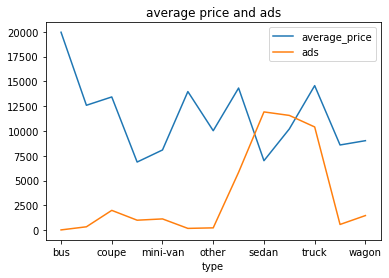

In [1484]:
average_price_ads.plot()
plt.title('average price and ads')
plt.show()

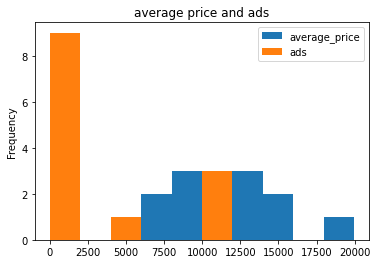

In [1485]:
average_price_ads.plot.hist(bins=10)
plt.title('average price and ads')
plt.show()

##### conclusion

The two types of vehicles with the greatest number of 'ads' are 'sedan' and 'suv' with 11,922 and 11569 respectively.

## Price factors


It will be checked whether the price of the vehicles are impacted by age, mileage, condition, transmission type, and color. This is going to be done by plotting a scatterplot for quantitative variables and box_and_whisker charts for catagorical variables. In order the analysis to be valid the days_listed will be taken at least 50 for categorical variables.

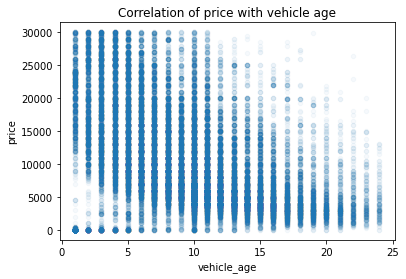

In [1486]:
# correlation of price with age of the vehicle
filtered_df.plot.scatter(x='vehicle_age', y='price', title='Correlation of price with vehicle age', alpha=0.04)
plt.show()

The scatterplot shows there is negative correlation between pricee and age of the vehicle. As the age of the vehicle increases the price decreases and vice versa. 

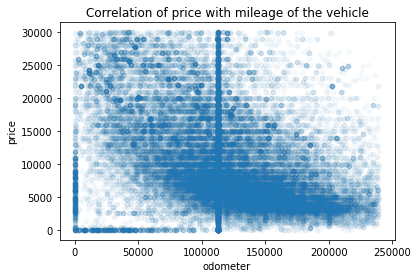

In [1487]:
# correlation of price with mileage
filtered_df.plot.scatter(x='odometer', y='price', title='Correlation of price with mileage of the vehicle', alpha=0.04)
plt.show()

The scatterplot shows there is negative correlation between price and mileage. As the mileage increases the price decreases and vice versa. 

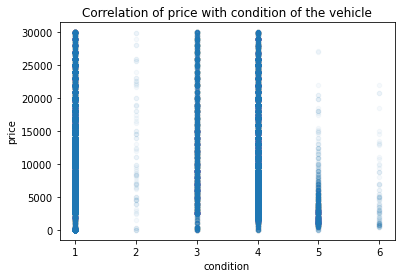

In [1488]:
# correlation of price with condition
filtered_df.plot.scatter(x='condition', y='price', title='Correlation of price with condition of the vehicle', alpha=0.04)
plt.show()

The scatterplot shows that excellent, like new and good vehicles sold with high price compared to others.

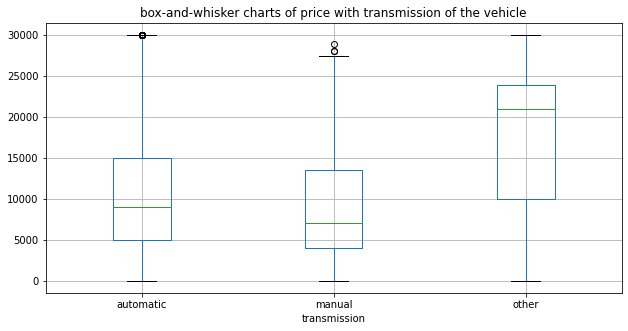

In [1489]:
# To check the impact of type of transmission of vehicles
filtered_df.query('days_listed >= 50').boxplot(column='price', by = 'transmission', figsize =(10, 5))
plt.title('box-and-whisker charts of price with transmission of the vehicle')
plt.suptitle('')
plt.show()

The box-whisher chart shows, authomatic vehicles are expensive than vehicles with manual transmission.

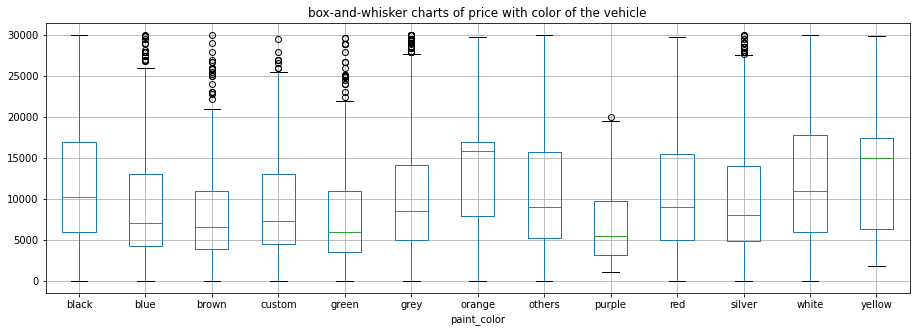

In [1490]:
filtered_df.query('days_listed >= 50').boxplot(column='price', by = 'paint_color', figsize =(15, 5))
plt.title('box-and-whisker charts of price with color of the vehicle')
plt.suptitle('')
plt.show()

In [1491]:
# correlation matrix among the variables
filtered_df.corr()


,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year_posted,vehicle_age,average_mileage
price,1.000000,0.495030,-0.103088,0.278195,-0.374470,0.314689,-0.003404,0.004304,-0.493178,0.199872
model_year,0.495030,1.000000,-0.194157,-0.154040,-0.497710,-0.034158,-0.002530,0.016221,-0.995549,0.486527
condition,-0.103088,-0.194157,1.000000,0.055169,0.151093,-0.030247,-0.004752,0.002156,0.193793,-0.049818
cylinders,0.278195,-0.154040,0.055169,1.000000,0.113762,0.385932,0.003313,-0.001462,0.153452,-0.047850
odometer,-0.374470,-0.497710,0.151093,0.113762,1.000000,0.073867,0.005777,-0.008971,0.495410,0.171432
is_4wd,0.314689,-0.034158,-0.030247,0.385932,0.073867,1.000000,0.001933,-0.004281,0.033655,0.022244
days_listed,-0.003404,-0.002530,-0.004752,0.003313,0.005777,0.001933,1.000000,0.010683,0.003530,-0.001464
year_posted,0.004304,0.016221,0.002156,-0.001462,-0.008971,-0.004281,0.010683,1.000000,0.078079,-0.104671
vehicle_age,-0.493178,-0.995549,0.193793,0.153452,0.495410,0.033655,0.003530,0.078079,1.000000,-0.494971
average_mileage,0.199872,0.486527,-0.049818,-0.047850,0.171432,0.022244,-0.001464,-0.104671,-0.494971,1.000000


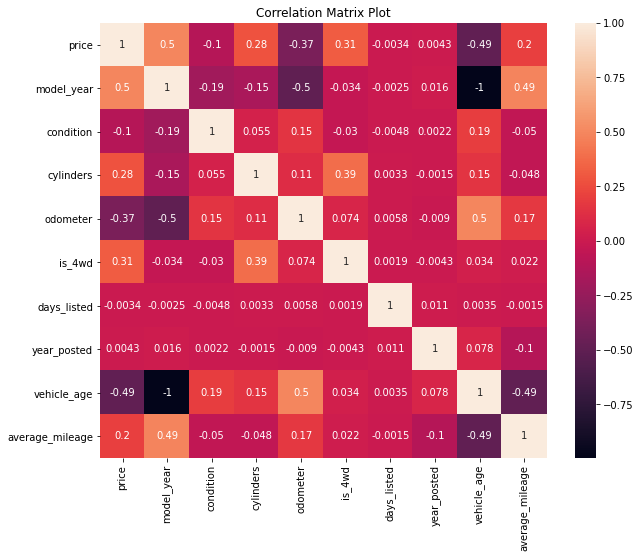

In [1492]:
# correlation plots among the variables
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_df.corr(), annot=True)
plt.title('Correlation Matrix Plot')
plt.show()

As it can be observed from the correlation plot there is no strong positive or negative correlation.

## General conclusion

The objective of this project is to determine which factors influence the price of a vehicle. The general and summary of the DataFrame was done to have a knowledge about the DataFrame. It was confirmed the DataFrame had 13 columns and 51,525 rows. The variables were the combination of quantitative and catagorical. From the raw data there were unappropriate data types, they were changed to the right data type. 

It was also confirmed there were missing values in 'model_year', 'cylinders', 'odometer', 'paint_color' and 'is_4wd' columns. It was also confirmed that there were no duplicated valuesin the DataFrame. But, there were outliers or anomalities in the dataFrame. In order to analyse the DataFrame of Crankshaft List the right methods were taken to removed the outliers from the DataFrame. Besides, the missing values of the dataFrame that can impact on the analysis of the data were removed when the outliers were removed. 

The hypothesis was confirmed apply Exploratory Data Analysis
  * Age has negative correletion with the price of the vehicles that is as age increases the price of the hevicle decreases and vice versa.
  * Mileage has negative correletion with the price of the vehicles that is as mileage increases the price of the hevicle decreases and vice versa.
  * The scatterplot shows, authomatic vehicles are expensive than vehicles with manual and other transmission.
  
  * The box-whisher chart shows, authomatic vehicles are expensive than vehicles with manual transmission.
  * The impact of color looks as if it has no impact but it needs further study.
  
From the correlation plots it was confirmed that variables have strong positive correlation with themselves. It was confirmed that the factors or variables had impact on the price of the vehicles but there was no strong correlation among the variables.